# Exploratory data analysis (EDA) - Haberman Data Set

# Exercise:

Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. 
(https://www.kaggle.com/gilsousa/habermans-survival-data-set)


Perform an alanlaysis on this dataset with the following sections:
    
High level statistics of the dataset: 
    
    number of points, 
    numer of features, 
    number of classes, 
    data-points per class.
    
Explain our objective. 


Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.

Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.


Write your observations in english as crisply and unambigously as possible. Always quantify your results.


In [1]:
#import corresponding libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
col_list = ['Age','Operation_Year','axil_nodes','Survival_status']
df_haber = pd.read_csv("haberman.csv",names=col_list)
df_haber.head()

,Age,Operation_Year,axil_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
print("High level statistics of the dataset:- " )
print('-'*80)

#number of points

print("Number of data points in the haberman dataset : ",df_haber.shape[0])
#numer of features

print("Number of features / Independent Variable in the haberman dataset : ",df_haber.shape[1])

#number of classes'
print('-'*80)
print("Number of classes  / Dependent Variable in the haberman dataset : \n",df_haber['Survival_status'].unique())
print('-'*80)
#data-points per class.

print("Number of data points per class the haberman dataset : \n",df_haber['Survival_status'].value_counts())

High level statistics of the dataset:- 
--------------------------------------------------------------------------------
Number of data points in the haberman dataset :  306
Number of features / Independent Variable in the haberman dataset :  4
--------------------------------------------------------------------------------
Number of classes  / Dependent Variable in the haberman dataset : 
 [1 2]
--------------------------------------------------------------------------------
Number of data points per class the haberman dataset : 
 1    225
2     81
Name: Survival_status, dtype: int64


**Obesrvation : **
    
As the count data points for each Class / Label / Dependent Varibale is not same the dataset is not balanced.

** Objective of the Problem Statement **

To classify the survival chances of a patient based on the independent features like :-
    
                1.age
                2. year of operation 
                3. number of positive axial nodes
            
Note :-
    Class / Label 
    --------------------------------------------------------
    1 :Survived - the patient survived 5 years or longer
    2 :Not Survived - the patient died within 5 year
        

In [9]:
df_haber.describe()

,Age,Operation_Year,axil_nodes,Survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.

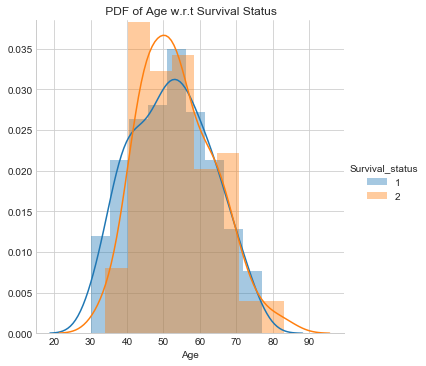

In [33]:
sns.set_style("whitegrid")
sns.FacetGrid(df_haber, hue="Survival_status", size=5).map(sns.distplot,"Age").add_legend()
plt.title(" PDF of Age w.r.t Survival Status")

**Observation :** This plot does not show any concrete idea about the survival status of patients corresponding to their age

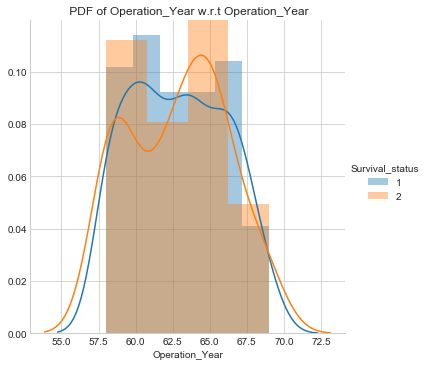

In [35]:
sns.set_style("whitegrid")
sns.FacetGrid(df_haber, hue="Survival_status", size=5).map(sns.distplot,"Operation_Year").add_legend()
plt.title(" PDF of Operation_Year w.r.t Operation_Year")

** Observation :** This plot does not help us to reach any conclusion about  the survival status of patients corresponding to the year they underwent operation 

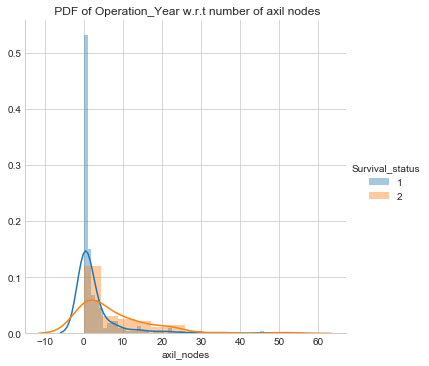

In [36]:
sns.set_style("whitegrid")
sns.FacetGrid(df_haber, hue="Survival_status", size=5).map(sns.distplot,"axil_nodes").add_legend()
plt.title(" PDF of Operation_Year w.r.t number of axil nodes")

** Observation ** - The above PDF shows that the patients had maximum chances of survival when no axil nodes were found.Also the patients who were detected within 1 to 5 axil nodes also survived .

In [10]:
#Analyze CDF for all three features / independent variables
survived = df_haber[df_haber["Survival_status"]== 1];
not_survived = df_haber[df_haber["Survival_status"]== 2];

In [11]:
print(survived.shape)
print(not_survived.shape)

(225, 4)
(81, 4)


Text(0.5,1,'  PDF/CDF of Age w.r.t not Survived cases')

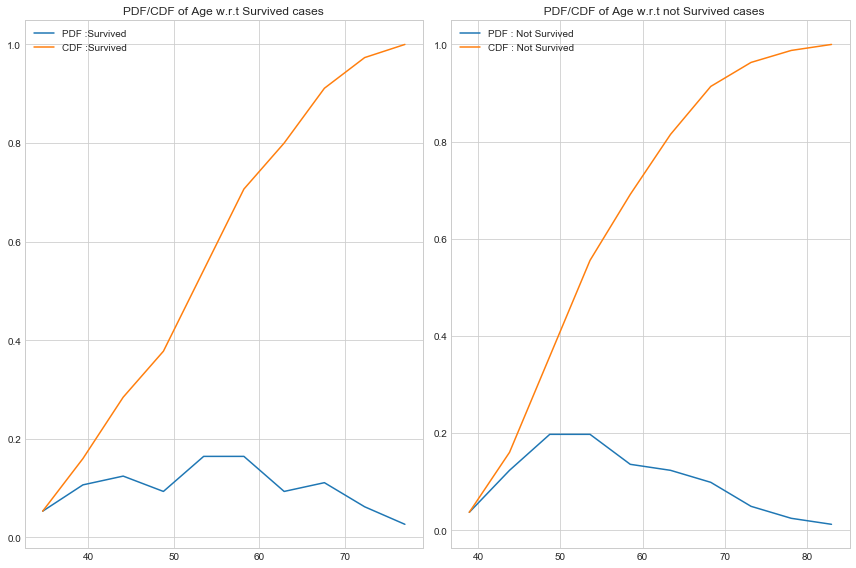

In [36]:
#CDF of Age w.r.t Survived cases
counts_survived, bin_edges_survived = np.histogram(survived["Age"], bins=10, density= True)

pdf_survived = counts_survived/(sum(counts_survived))
cdf_survived = np.cumsum(pdf_survived)

plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
plt.plot(bin_edges_survived[1:], pdf_survived,label="PDF :Survived")
plt.plot(bin_edges_survived[1:], cdf_survived,label="CDF :Survived")
plt.legend()
plt.tight_layout()
plt.title("PDF/CDF of Age w.r.t Survived cases")

#CDF of Age w.r.t Not Survived cases

counts_notsurvived, bin_edges_notsurvived = np.histogram(not_survived["Age"], bins=10, density= True)

pdf_notsurvived = counts_notsurvived/(sum(counts_notsurvived))
cdf_notsurvived = np.cumsum(pdf_notsurvived)

plt.subplot(1, 2, 2)
plt.plot(bin_edges_notsurvived[1:], pdf_notsurvived,label="PDF : Not Survived")
plt.plot(bin_edges_notsurvived[1:], cdf_notsurvived,label="CDF : Not Survived")
plt.legend()
plt.tight_layout()
plt.title("  PDF/CDF of Age w.r.t not Survived cases")


** Observation : **
    
subplot 1 : 42% of the patients who survived upto 5 or more  years after surgery were 50 years of age.
    
subplot 2 : 41 % of the patients who did not survive upto 5 years after surgery were 0f 50 years age.
    

Text(0.5,1,'  PDF/CDF of Operation_Year w.r.t not Survived cases')

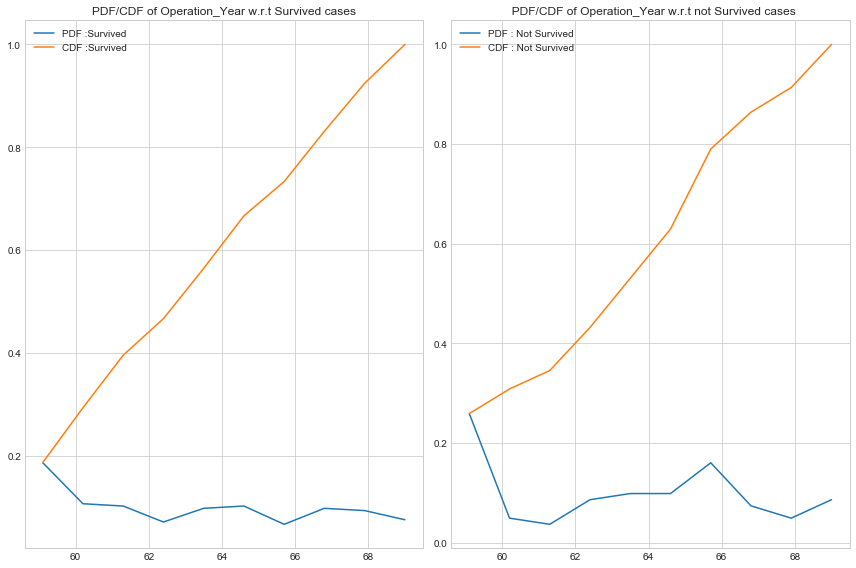

In [37]:
#CDF of Year of operation w.r.t Survived cases
counts_survived, bin_edges_survived = np.histogram(survived["Operation_Year"], bins=10, density= True)

pdf_survived = counts_survived/(sum(counts_survived))
cdf_survived = np.cumsum(pdf_survived)

plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
plt.plot(bin_edges_survived[1:], pdf_survived,label="PDF :Survived")
plt.plot(bin_edges_survived[1:], cdf_survived,label="CDF :Survived")
plt.legend()
plt.tight_layout()
plt.title("PDF/CDF of Operation_Year w.r.t Survived cases")

#CDF of Year of operation w.r.t Not Survived cases

counts_notsurvived, bin_edges_notsurvived = np.histogram(not_survived["Operation_Year"], bins=10, density= True)

pdf_notsurvived = counts_notsurvived/(sum(counts_notsurvived))
cdf_notsurvived = np.cumsum(pdf_notsurvived)

plt.subplot(1, 2, 2)
plt.plot(bin_edges_notsurvived[1:], pdf_notsurvived,label="PDF : Not Survived")
plt.plot(bin_edges_notsurvived[1:], cdf_notsurvived,label="CDF : Not Survived")
plt.legend()
plt.tight_layout()
plt.title("  PDF/CDF of Operation_Year w.r.t not Survived cases")


Text(0.5,1,'  PDF/CDF of axil_nodes w.r.t not Survived cases')

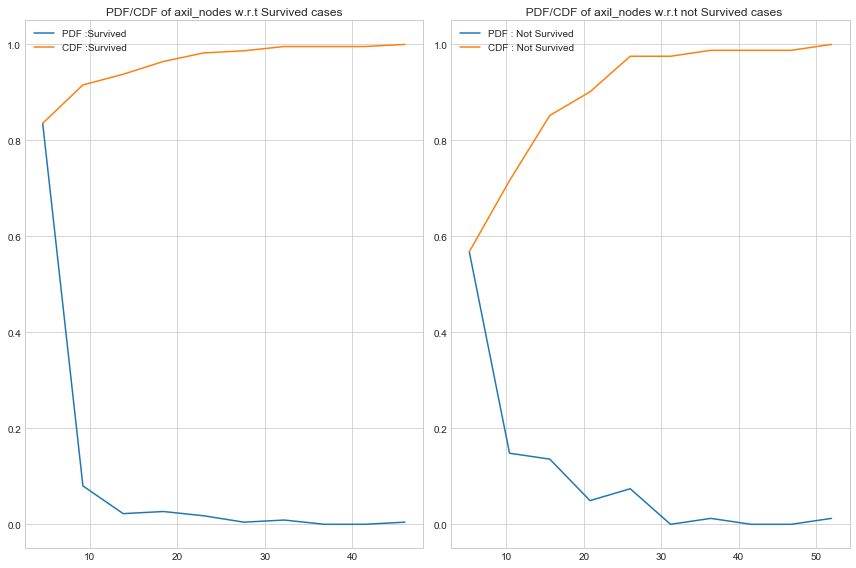

In [38]:
#CDF of axil_nodes w.r.t Survived cases
counts_survived, bin_edges_survived = np.histogram(survived["axil_nodes"], bins=10, density= True)

pdf_survived = counts_survived/(sum(counts_survived))
cdf_survived = np.cumsum(pdf_survived)

plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
plt.plot(bin_edges_survived[1:], pdf_survived,label="PDF :Survived")
plt.plot(bin_edges_survived[1:], cdf_survived,label="CDF :Survived")
plt.legend()
plt.tight_layout()
plt.title("PDF/CDF of axil_nodes w.r.t Survived cases")

#CDF of axil_nodes w.r.t Not Survived cases

counts_notsurvived, bin_edges_notsurvived = np.histogram(not_survived["axil_nodes"], bins=10, density= True)

pdf_notsurvived = counts_notsurvived/(sum(counts_notsurvived))
cdf_notsurvived = np.cumsum(pdf_notsurvived)

plt.subplot(1, 2, 2)
plt.plot(bin_edges_notsurvived[1:], pdf_notsurvived,label="PDF : Not Survived")
plt.plot(bin_edges_notsurvived[1:], cdf_notsurvived,label="CDF : Not Survived")
plt.legend()
plt.tight_layout()
plt.title("  PDF/CDF of axil_nodes w.r.t not Survived cases")


** Observation : **

subplot 1: 88% of the patients detected with 0 -8 axil nodes survived .

subplot 2 : 75 % of the patients detected with 10 axil nodes did not survive.

Text(0.5,1,'Box Plot of Survival Status w.r.t Age')

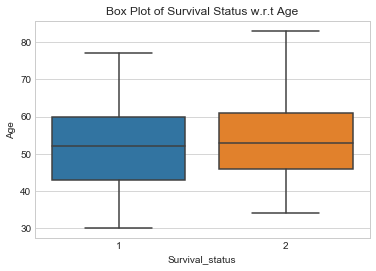

In [40]:
#BoxPlots
sns.set_style("whitegrid")
sns.boxplot(x='Survival_status', y= 'Age', data = df_haber)
plt.title("Box Plot of Survival Status w.r.t Age")

** Observation :**

Average age of patients who survived is 52 while the average age of people who did not survive is 54.

1st quartile survived age = 44

3rd quartile survied age = 60

1st quartile  not survived age = 45

3rd quartile not survied age = 61

Text(0.5,1,'Box Plot of Operation_Year w.r.t Age')

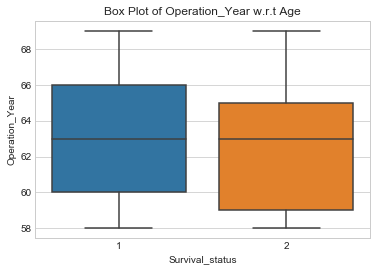

In [41]:
#Box Plot Operation_Year
sns.set_style("whitegrid")
sns.boxplot(x='Survival_status', y= 'Operation_Year', data = df_haber)
plt.title("Box Plot of Operation_Year w.r.t Age")

Text(0.5,1,'Box Plot of axil_nodes w.r.t Age')

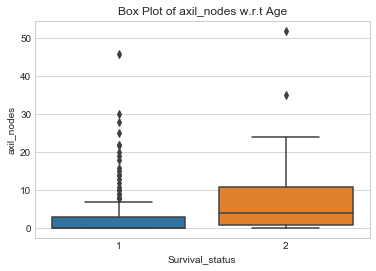

In [43]:
#Box Plot axil_node
sns.set_style("whitegrid")
sns.boxplot(x='Survival_status', y= 'axil_nodes', data = df_haber)
plt.title("Box Plot of axil_nodes w.r.t Age")

** Observation : **
    
People with zero axil nodes survived the most. Maximum axil nodes for which patients had survived is 8.

People detected with 4 axil nodes on an average did not survive.

The box plot also depicts that the data points for survived has lot of outliers

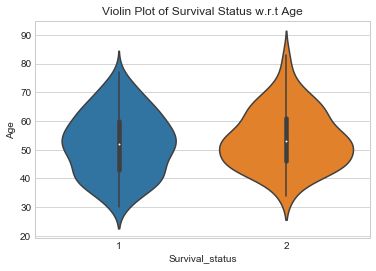

In [6]:
#Violin Plots w.r.t. Age
sns.set_style('whitegrid')
sns.violinplot(x='Survival_status', y= 'Age', data = df_haber)
plt.title("Violin Plot of Survival Status w.r.t Age")

** Observation :**

Average age of patients who survived is 52 while the average age of people who did not survive is 54.

1st quartile survived age = 44

3rd quartile survied age = 60

1st quartile  not survived age = 45

3rd quartile not survied age = 61

In addition to the above information it also represents the PDF for Survived and not survived across y axis.

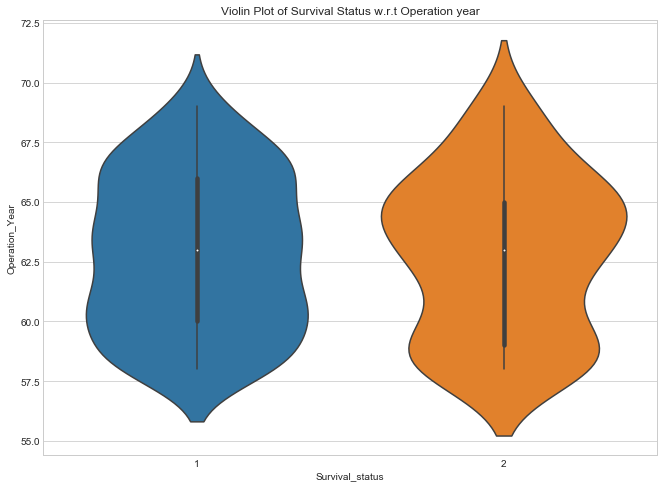

In [48]:
#Violin Plots w.r.t. Operation_Year
plt.figure(figsize=(11,8))
sns.set_style('whitegrid')
sns.violinplot(x='Survival_status', y= 'Operation_Year', data = df_haber)
plt.title("Violin Plot of Survival Status w.r.t Operation year")

** Observation :**

Violin plot does not provide any concrete information about the survival of patients based on the year of operation.

1st quartile patients who survived were operated in the year 1959

3rd quartile patients who survived were operated in the year 1966

1st quartile  who did not survive were operated in the year  1958

3rd quartile who did not survive  were operated in the year  1965

In addition to the above information it also represents the PDF for Survived and not survived across w.r.t operation year on y axis.

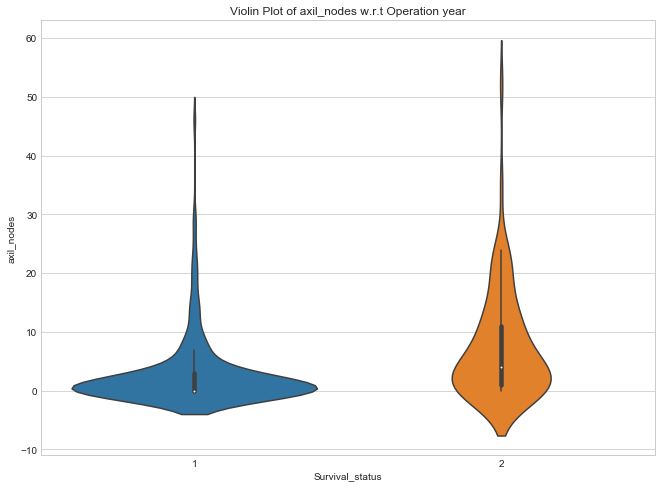

In [47]:
#Violin Plots w.r.t. axil_nodes
plt.figure(figsize=(11,8))
sns.set_style('whitegrid')
sns.violinplot(x='Survival_status', y= 'axil_nodes', data = df_haber)
plt.title("Violin Plot of axil_nodes w.r.t Operation year")


In [ ]:
** Observation : **
    
People with zero axil nodes survived the most. Maximum axil nodes for which patients had survived is 46.

People detected with 7 axil nodes on an average did not survive.

Maximum axil nodes for which patients had not survived is 52

The box plot also depicts that the data points for survived has lot of outliers

In [13]:
survived.describe()

,Age,Operation_Year,axil_nodes,Survival_status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [14]:
not_survived.describe()

,Age,Operation_Year,axil_nodes,Survival_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


**Observation: **
Mean of Nodes detected  for patients is who survived is 2.791111 (3 approx)
While mean of Nodes detected  for patients is who did not  survive is 7.456790 (7 approx), which seems higher nodes leads
to death.

This again shows close correlation between nodes present and survival of the patients

# Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication

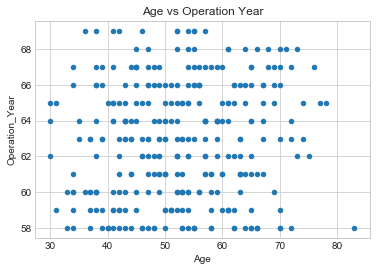

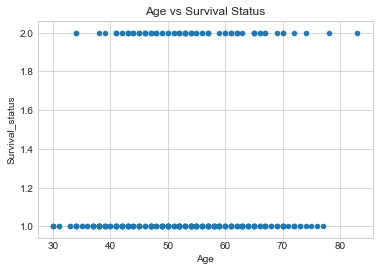

In [20]:
#2D scatter plot

df_haber.plot(kind='scatter', x= 'Age', y="Operation_Year")
plt.title("Age vs Operation Year")

df_haber.plot(kind='scatter', x= 'Age', y="Survival_status")
plt.title("Age vs Survival Status")


** Observation : **
The combination of features Age and Operation year does not give us any information regarding survival of patients.


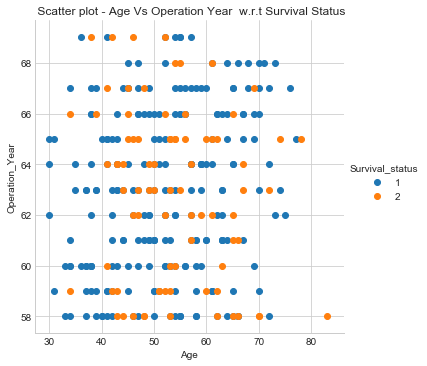

In [22]:
#Analyze two features(Age,Operation Year) at a time  with respect to  Survival Status

sns.set_style("whitegrid")
sns.FacetGrid(df_haber, hue="Survival_status", size=5).map(plt.scatter,"Age","Operation_Year").add_legend()
plt.title(" Scatter plot - Age Vs Operation Year  w.r.t Survival Status")

** Observation : **
The combination of features Age and Operation year does not give us any information regarding survival of patients.


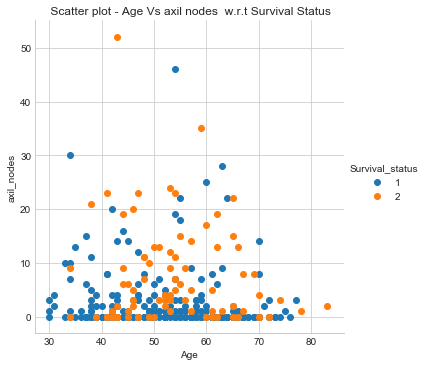

In [23]:
#Analyze two features(Age,Axil_nodes) at a time  with respect to  Survival Status

sns.set_style("whitegrid")
sns.FacetGrid(df_haber, hue="Survival_status", size=5).map(plt.scatter,"Age","axil_nodes").add_legend()
plt.title(" Scatter plot - Age Vs axil nodes  w.r.t Survival Status")

**  Observation : ** 
    
    Cannot infer any conclusion clearly. But the one thing which we can visualize is that irrespective of any age the survival chances were more if the patient had  0 axil nodes.

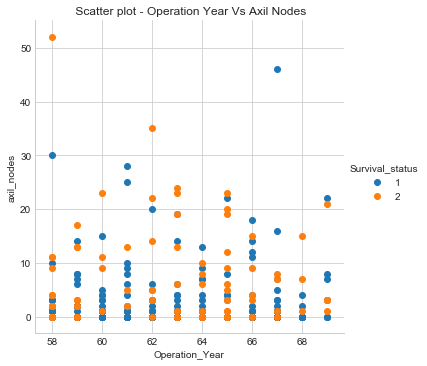

In [27]:
#Analyze two features(Operation year,Axil_nodes) at a time  with respect to  Survival Status

sns.set_style("whitegrid")
sns.FacetGrid(df_haber, hue="Survival_status", size=5).map(plt.scatter,"Operation_Year","axil_nodes").add_legend()
plt.title(" Scatter plot - Operation Year Vs Axil Nodes")

**  Observation : ** 
    
    Cannot infer any conclusion clearly.The plot does not represent any corelation between Opeartion Year and axil nodes.

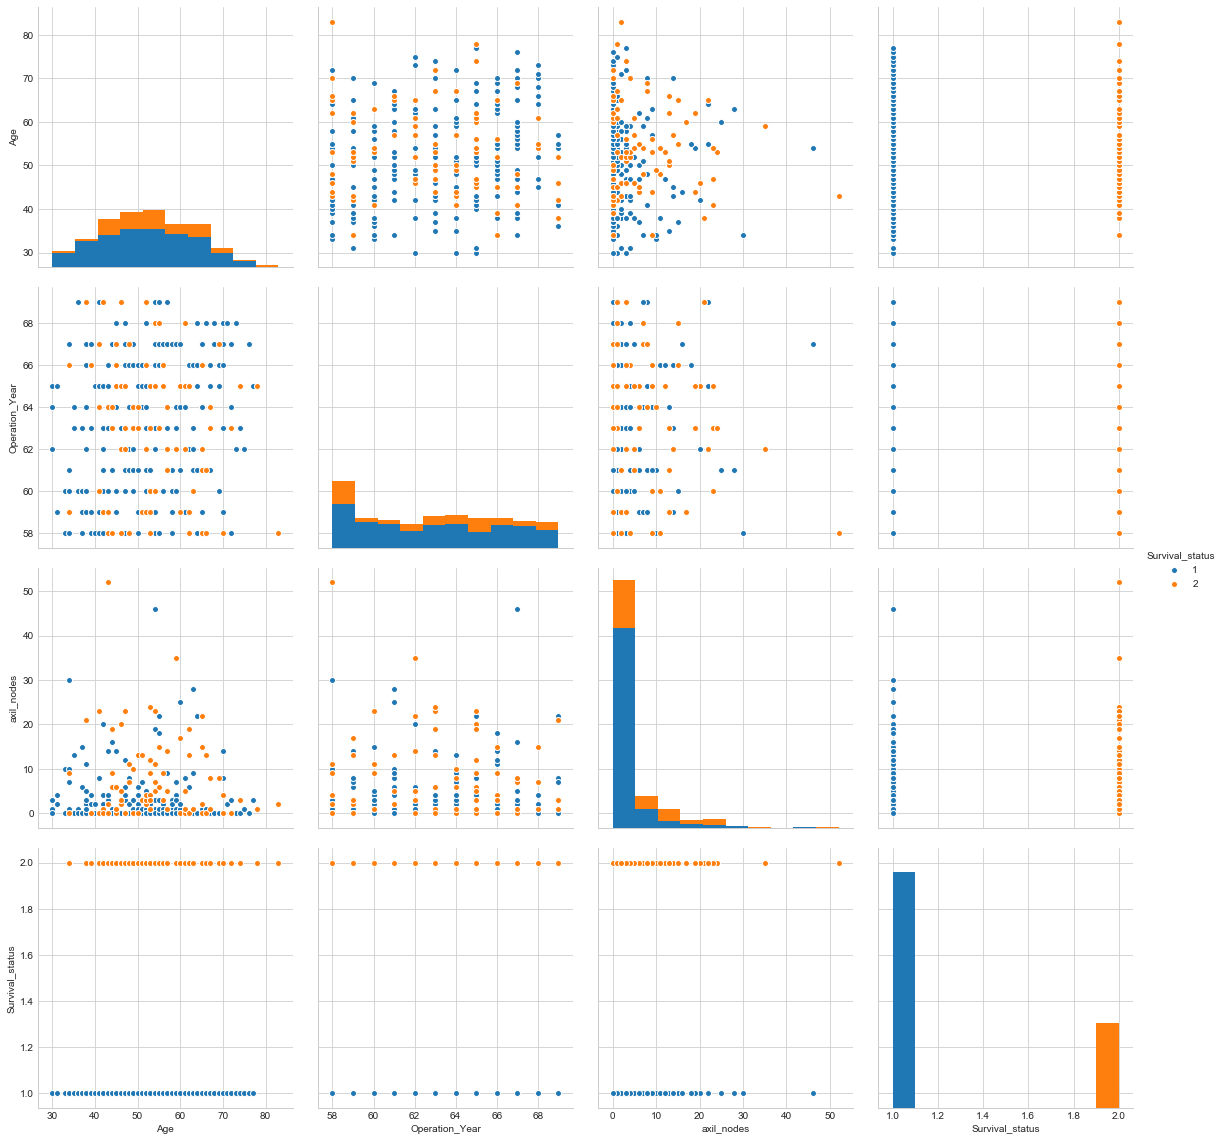

In [49]:
#Pairplot
plt.figure(figsize=(11,8))
sns.set_style("whitegrid")
sns.pairplot(df_haber,hue='Survival_status',size=4)

** Observation : **

Pairplot helps to get an overview of which features help to clasify the objective with clarity.
In the above Pairplot, all the above features are not able to provide a clear separation between them. 
So there seems less clarity in classifying survived or deceased.
If considered individually only the Operation_Year feature and axil_nodes have better separation of data points, but
this information alone does not help us to classify our objective of predicting whethera patient would survive or not.